## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [90]:
#讀取 bobston data
boston = datasets.load_boston()

In [91]:
#切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4) 

In [92]:
#建立一個線性回歸模型
regr = linear_model.LinearRegression()

#將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

#將測試資料丟進模型預測結果
y_pred = regr.predict(x_test)

In [93]:
#可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

#預測值與實際值的差距，使用 MSE
print('Mean sqaured error: %.3f'
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
Mean sqaured error: 17.039


In [101]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Attribute: CRIM
Coefficients:  [-0.44294703]
Mean squared error: 76.108


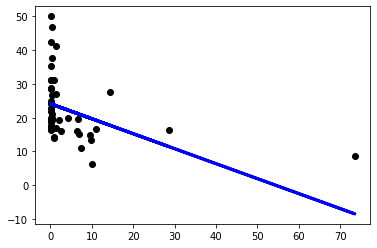

Attribute: ZN
Coefficients:  [0.14048843]
Mean squared error: 63.779


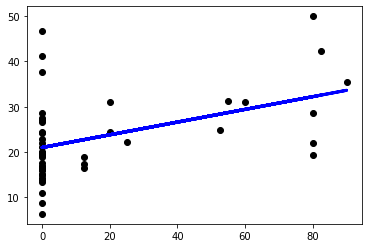

Attribute: INDUS
Coefficients:  [-0.64959885]
Mean squared error: 63.064


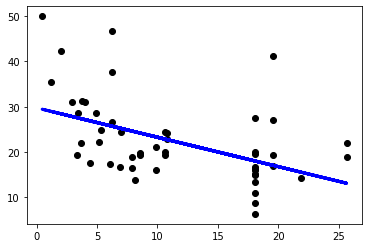

Attribute: CHAS
Coefficients:  [7.48533333]
Mean squared error: 88.058


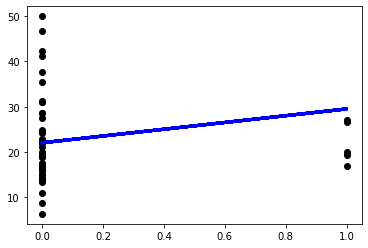

Attribute: NOX
Coefficients:  [-34.09301439]
Mean squared error: 67.723


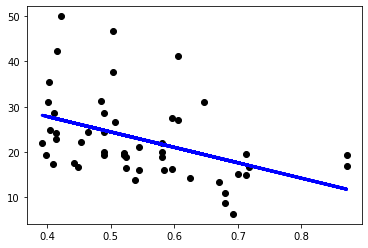

Attribute: RM
Coefficients:  [8.95430408]
Mean squared error: 32.396


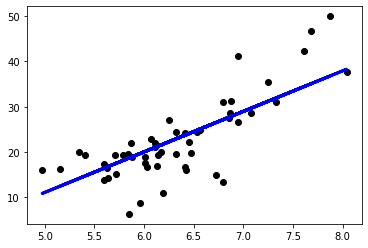

Attribute: AGE
Coefficients:  [-0.12145796]
Mean squared error: 64.851


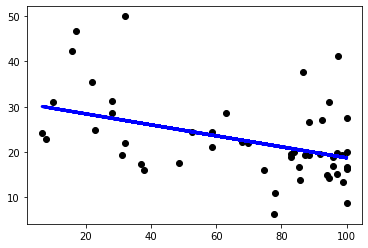

Attribute: DIS
Coefficients:  [1.08133057]
Mean squared error: 75.823


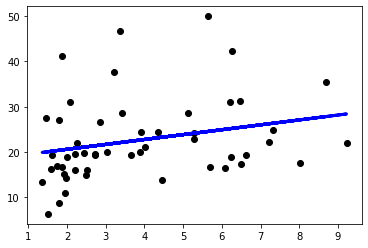

Attribute: RAD
Coefficients:  [-0.40020672]
Mean squared error: 68.873


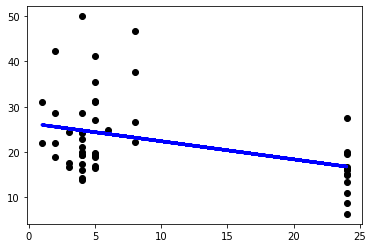

Attribute: TAX
Coefficients:  [-0.02558027]
Mean squared error: 65.463


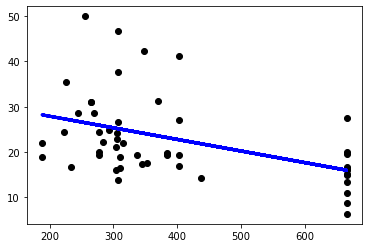

Attribute: PTRATIO
Coefficients:  [-2.13846286]
Mean squared error: 57.167


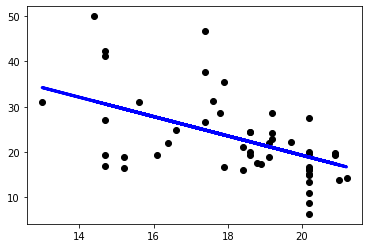

Attribute: B
Coefficients:  [0.03381633]
Mean squared error: 72.459


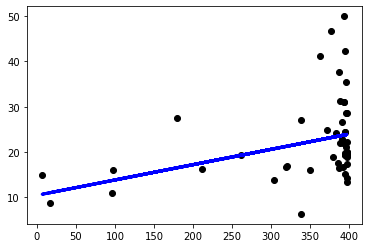

Attribute: LSTAT
Coefficients:  [-0.94532598]
Mean squared error: 35.541


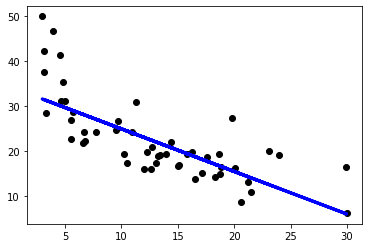

In [102]:
mse_vec = np.zeros(boston.data.shape[1])
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)使用 for loop　抓取一欄特徵
for i in range(boston.data.shape[1]):
    X = boston.data[:, np.newaxis, i]
    print("Attribute:", boston.feature_names[i])

    # 切分訓練集/測試集
    x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)

    # 將訓練資料丟進去模型訓練
    regr.fit(x_train, y_train)

    # 將測試資料丟進模型得到預測結果
    y_pred = regr.predict(x_test)

    # 可以看回歸模型的參數值
    print('Coefficients: ', regr.coef_)

    # 預測值與實際值的差距，使用 MSE
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %.3f"
          % mse)
    mse_vec[i] = mse
    # 畫出回歸模型與實際資料的分佈
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.show()

## 使用羅吉斯回歸模型

In [103]:
# 讀取 wine data
wine = load_wine()

# trainset data / testset data
x_train1, x_test1, y_train1, y_test1 = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

#建立一個 logistic model
regr = LogisticRegression()

#將訓練資料丟進去模型訓練
regr.fit(x_train1, y_train1)

#將測試資料丟進模型得到預測結果
y_pred1 = regr.predict(x_test1)

C:\Users\MCUT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
acc = accuracy_score(y_test1, y_pred1)
print('Accuracy:', acc)

Accuracy: 0.8888888888888888
